<a href="https://colab.research.google.com/github/Captmoonshot/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [9]:
import math

sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

mean_sales = sum(sales)/len(sales)
print("mean: $", mean_sales)

variance_sales = sum((i - mean_sales)**2 for i in sales) / len(sales)
print("\nvariance: $", variance_sales)

standard_dev_sales = math.sqrt(variance_sales)
print("\nstandard deviation: $", standard_dev_sales)


mean: $ 3052.714285714286

variance: $ 183761.06122448976

standard deviation: $ 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [19]:
import numpy as np


customers = [127, 80, 105, 92, 120, 115, 93]

covariance = np.cov(sales, customers, ddof=0)[0][1]


# print(covariance)
print("covariance of sales and customers: ", covariance)

covariance of sales and customers:  6518.020408163265


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [23]:
standard_dev_customers = np.std(customers)
print("standard deviation of customers: $", standard_dev_customers)

corr_coefficient = covariance / (standard_dev_sales * standard_dev_customers)
print("\ncorrelation coefficient: ", corr_coefficient)

print("\ncorrelation coefficient using numpy: ", np.corrcoef(sales, customers)[0,1])

standard deviation of customers: $ 15.792015549069118

correlation coefficient:  0.9628339778148909

correlation coefficient using numpy:  0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [47]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [48]:
numeric_df = df.select_dtypes(include=['number']).copy()
numeric_df.drop(['Unnamed: 0', 'body'], inplace=True, axis=1)
numeric_df.head()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
0,1.0,1.0,29.0000,0.0,0.0,211.3375,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,1


In [49]:
numeric_df[numeric_df.isnull().any(axis=1)]

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
1225,3.0,0.0,60.500000,0.0,0.0,NaN,0
1309,NaN,NaN,29.881135,NaN,NaN,NaN,0


In [50]:
numeric_df.fillna(method='ffill', inplace=True)
numeric_df.isna().sum()

pclass              0
survived            0
age                 0
sibsp               0
parch               0
fare                0
has_cabin_number    0
dtype: int64

In [51]:
numeric_df.head()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
0,1.0,1.0,29.0000,0.0,0.0,211.3375,1
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1
2,1.0,0.0,2.0000,1.0,2.0,151.5500,1
3,1.0,0.0,30.0000,1.0,2.0,151.5500,1
4,1.0,0.0,25.0000,1.0,2.0,151.5500,1


In [52]:
numeric_df.has_cabin_number.value_counts()

0    1015
1     295
Name: has_cabin_number, dtype: int64

In [53]:
# Variance-Covariance Matrix:

numeric_df.cov()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,0.701812,-0.127357,-3.951584,0.052781,0.013070,-24.218042,-0.249923
survived,-0.127357,0.236181,-0.314103,-0.013932,0.034861,6.151406,0.061424
age,-3.951584,-0.314103,165.850021,-2.557851,-1.458263,113.651280,1.463138
sibsp,0.052781,-0.013932,-2.557851,1.084413,0.336722,8.647858,-0.003858
parch,0.013070,0.034861,-1.458263,0.336722,0.748735,9.927754,0.013372
fare,-24.218042,6.151406,113.651280,8.647858,9.927754,2675.845648,10.968906
has_cabin_number,-0.249923,0.061424,1.463138,-0.003858,0.013372,10.968906,0.174613


In [54]:
# Correlation Matrix:

numeric_df.corr()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,1.000000,-0.312816,-0.366271,0.060502,0.018030,-0.558853,-0.713932
survived,-0.312816,1.000000,-0.050187,-0.027529,0.082901,0.244693,0.302469
age,-0.366271,-0.050187,1.000000,-0.190730,-0.130862,0.170603,0.271887
sibsp,0.060502,-0.027529,-0.190730,1.000000,0.373689,0.160539,-0.008865
parch,0.018030,0.082901,-0.130862,0.373689,1.000000,0.221797,0.036982
fare,-0.558853,0.244693,0.170603,0.160539,0.221797,1.000000,0.507451
has_cabin_number,-0.713932,0.302469,0.271887,-0.008865,0.036982,0.507451,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

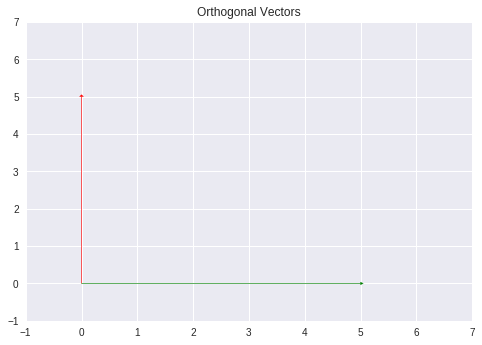

In [56]:
import matplotlib.pyplot as plt

vector_1 = [0, 5]
vector_2 = [5, 0]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.07, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.07, head_length=0.05, color ='green')
plt.xlim(-1,7)          
plt.ylim(-1,7)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [59]:
# In order for two vectors to be orthogonal to each other the dot product between them must be 0

a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

dot_product = np.dot(a, b)
print("dot_product: ", dot_product)

dot_product:  -40


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [63]:
c = [2, -15, 6, 20]

print("norm of c: ", np.linalg.norm(c)**2)
print("dot product of c and c: ", np.dot(c, c))
print("product of c and c-tranpose: ", (np.dot(np.array(c).T, c)))

# All the quantities are the same

norm of c:  665.0
dot product of c and c:  665
product of c and c-tranpose:  665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix}1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0\\1 \end{bmatrix} = 7\hat{i} + 
12\hat{j}
\qquad
\end{align}



\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix} = 2\begin{bmatrix} 1\\0\\0 \end{bmatrix} + 3\begin{bmatrix} 0\\1\\0 \end{bmatrix}
+(-8)\begin{bmatrix} 0\\0\\1 \end{bmatrix} = 2\hat{i} + 11\hat{j}  + (-8)\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [66]:
f = [4, 12, 11, 9, 2]

f_vect = np.array(f)
f_unit_vect = f_vect / (np.linalg.norm(f_vect))
print("f as unit vector: ", f_unit_vect)

f as unit vector:  [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

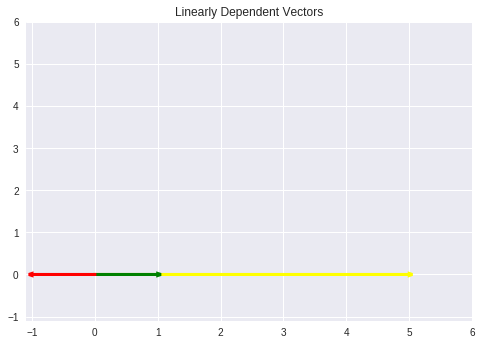

In [69]:
# Plot Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-1.1,6)          
plt.ylim(-1.1,6)

# Original Vector
v = [1,0] 

# Scaled Vectors
v2 = np.multiply(5, v)
v3 = np.multiply(-1,v)


plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, v3[0], v3[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Dependent Vectors")
plt.show()

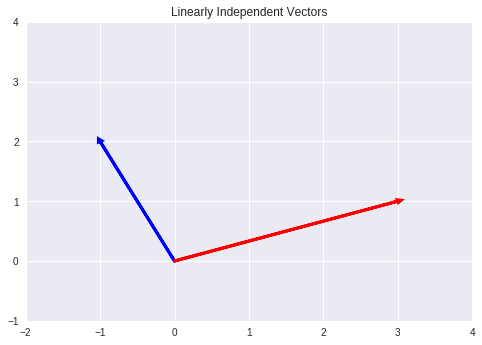

In [71]:
# Plot Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-2,4)          
plt.ylim(-1,4)

# Original Vector
a = [-1,2] 
b = [3, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# Cannot find the span because these two vectors are scaler multiples of each other, and therefore new vectors
# cannot be created with linear combinations

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

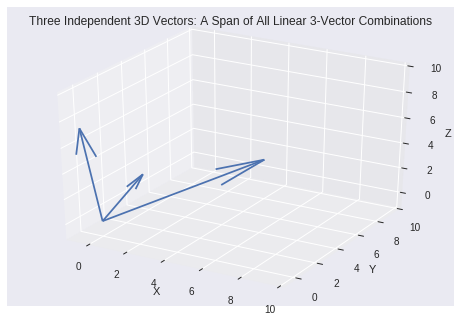

In [73]:
from mpl_toolkits.mplot3d import Axes3D

l = [1, 2, 3]
m = [-1, 0, 7]
n = [4, 8, 2]

vectors = np.array([[0, 0, 0, 1, 2, 3], 
                    [0, 0, 0, -1, 0, 7],
                    [0, 0, 0, 4, 8, 2]])

X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
ax.set_zlim([-1, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title("Three Independent 3D Vectors: A Span of All Linear 3-Vector Combinations")
plt.show()

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



In [74]:
# Original Vectors
a = [-1.5,.5] 
b = [3, 1]

a_unit = np.array(a) / np.linalg.norm(np.array(a))
b_unit = np.array(b) / np.linalg.norm(np.array(b))
print("a unit vector: ", a_unit)
print("b unit vector: ", b_unit)

a unit vector:  [-0.9486833   0.31622777]
b unit vector:  [0.9486833  0.31622777]


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


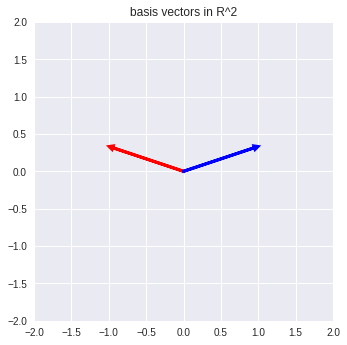

In [80]:
# Axis Bounds
plt.xlim(-2,2)          
plt.ylim(-2,2)

# Unit Vectors
i_hat = a_unit
j_hat = b_unit

# Fix Axes
plt.axes().set_aspect('equal')

# PLot Vectors
plt.arrow(0, 0, i_hat[0], i_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, j_hat[0], j_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.title("basis vectors in R^2")
plt.show()

## 6.2 What does it mean to form a basis?

### A Basis in Linear Algebra is a set of vectors that are linearly independent and if their linear combinations fill the vector space

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [84]:
P_matrix = np.mat('1 2 3; -1 0 7; 4 8 2')
P_matrix_rank = np.linalg.matrix_rank(P_matrix)

print("Rank of Matrix P: ", P_matrix_rank)

Rank of Matrix P:  3


## 7.2 What does the rank of a matrix tell us?

### The rank of a matrix tells us in what dimensional space the matrix spans.  So because the above matrix is Rank 3 it can span 3 Dimensional Space.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

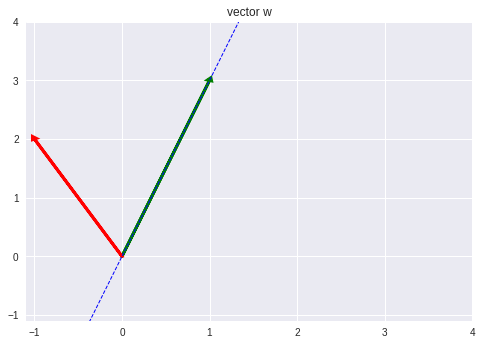

In [87]:
# Plot a line

# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [1,3]    # green
w = [-1,2]    # red  
proj = 
# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 3 * x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("vector w")
plt.show()

In [98]:
v = np.array([1, 3])
w = np.array([-1, 2])
proj = np.array(proj_w_onto_L)

# Formula for projection of w onto v(L)
proj_w_onto_L = ((np.dot(w, v)) / (np.dot(v, v))) * v
print("Projection of W onto L: ", proj_w_onto_L)


Projection of W onto L:  [0.5 1.5]


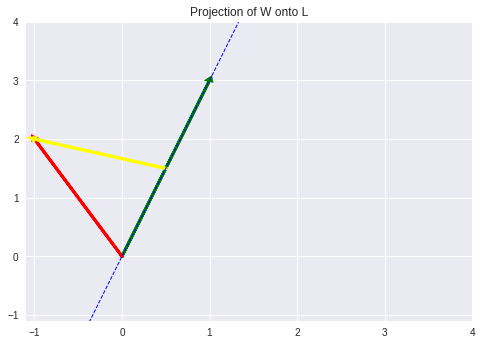

In [97]:
# Plot a line

# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [1,3]    # green
w = [-1,2]    # red  
proj = [0.5, 1.5]
x_minus_proj = np.array(w)-np.array(proj)

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 3 * x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)    # L line
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(proj[0], proj[1], x_minus_proj[0], x_minus_proj[1], linewidth=3, head_width=.05, head_length=0.05, color = 'yellow')

plt.title("Projection of W onto L")
plt.show()


# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

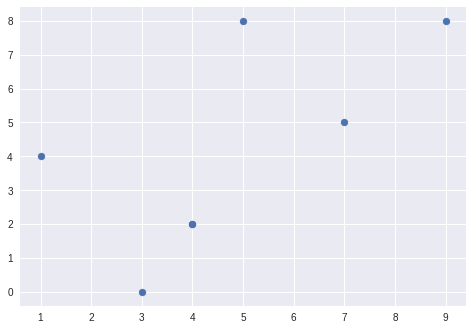

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()